In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(200929)

In [11]:
# Carga del CSV
df = pd.read_csv('./energydata_complete.csv')

# Obtener el número de observaciones
num_observaciones = df.shape[0]
print(num_observaciones)


19735


In [12]:
df['date'] = pd.to_datetime(df['date'])

# Crear nuevas columnas para año, mes, y día
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [13]:
# Eliminar columnas no deseadas
df = df.drop(columns=['date', 'rv1', 'rv2'])

In [14]:
from sklearn.preprocessing import scale

# Escalar las variables
scaled_data = scale(df)

/Users/mayel/jupyter/maestria/maestria_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayel/jupyter/maestria/maestria_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayel/jupyter/maestria/maestria_venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayel/jupyter/maestria/maestria_venv/lib/python3.8/site-packages/sklearn/cluster/

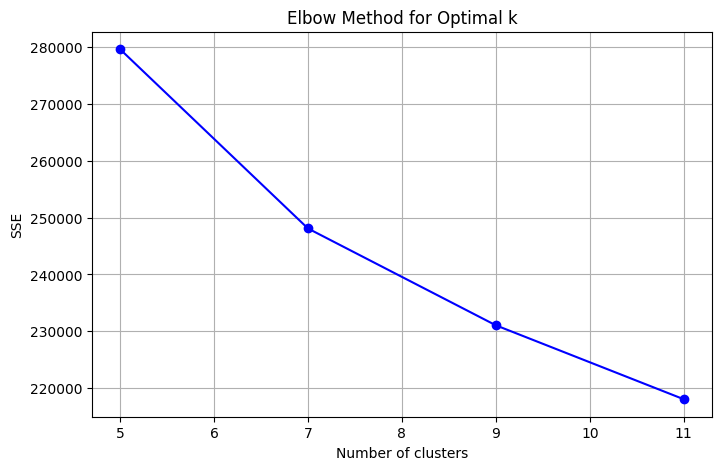

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Realizar clustering con diferentes números de clusters
sse = {}
for k in [5, 7, 9, 11]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse[k] = kmeans.inertia_

# Generar la gráfica de codo
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


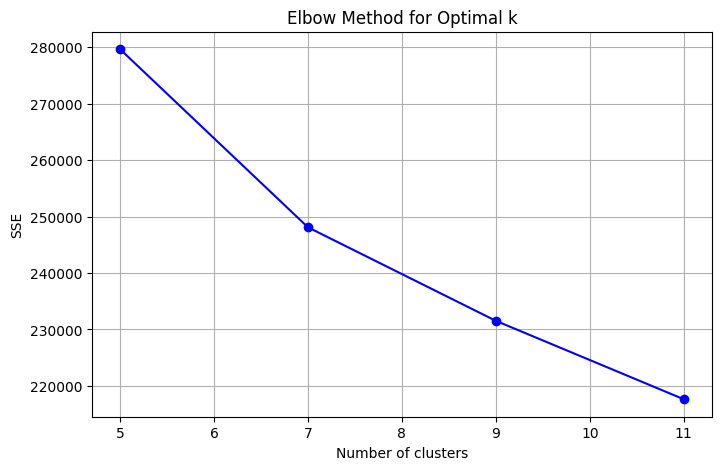

[1.3189688193497353, -0.11107981935137018, 1.006706356815472, -0.9760635731942258, -0.7801833256704984, 1.418211768965679, -0.265452566888491]


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Realizar clustering con diferentes números de clusters
sse = {}
centroides_kmeans_7_aux = []

for k in [5, 7, 9, 11]:
    kmeans = KMeans(n_clusters=k, n_init=10)  # Agregamos n_init para evitar la advertencia
    kmeans.fit(scaled_data)
    sse[k] = kmeans.inertia_

    if k == 7:  # Almacenamos los centroides para k=7
        centroides_kmeans_7 = kmeans.cluster_centers_
        for i, element in enumerate(centroides_kmeans_7):
            aux = {}
            for j, col in enumerate(df.columns[:len(element)]):  # Ajustar el rango para evitar el error de índice
                aux[col] = element[j]
            aux['grupo'] = str(i)
            centroides_kmeans_7_aux.append(aux)

# Generar la gráfica de codo
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Imprimir las coordenadas de los centroides para RH_3 en k=7
rh3_centroids = [centroide['RH_3'] for centroide in centroides_kmeans_7_aux]
print(rh3_centroids)


In [22]:
# Etiquetar las observaciones con su grupo
df['cluster'] = kmeans.labels_

# Contar el número de observaciones por grupo
group_counts = df['cluster'].value_counts()
print(group_counts)


cluster
5    3941
0    3867
2    3767
4    2876
3    2463
1    1419
6    1402
Name: count, dtype: int64


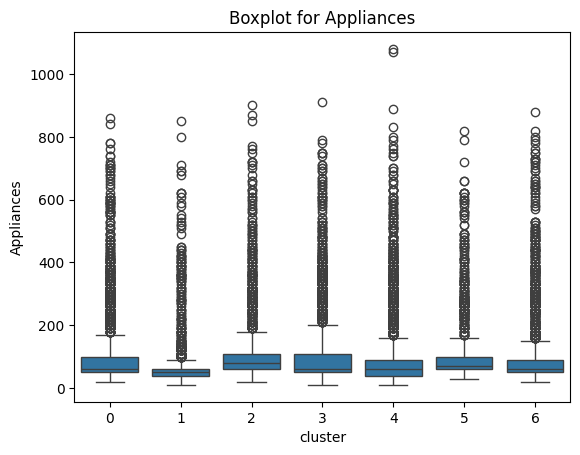

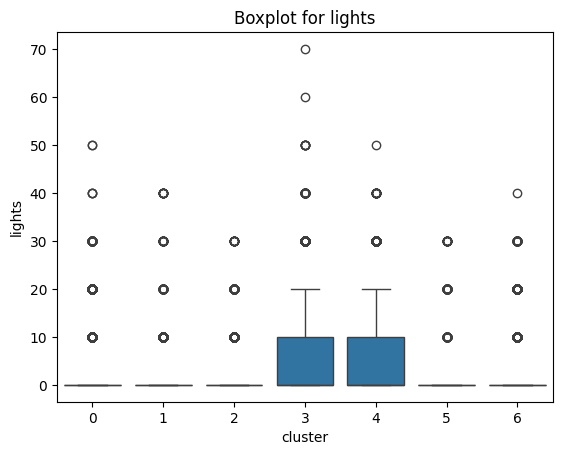

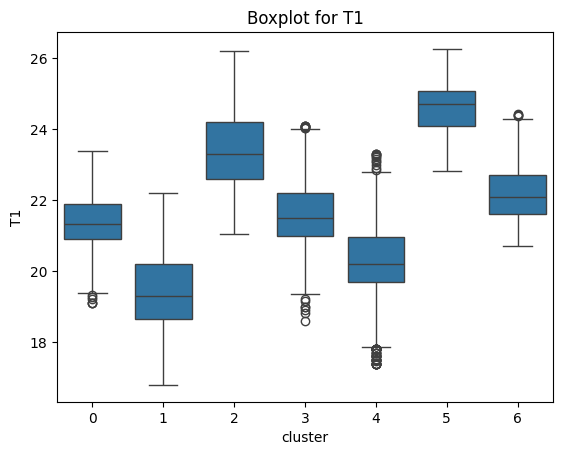

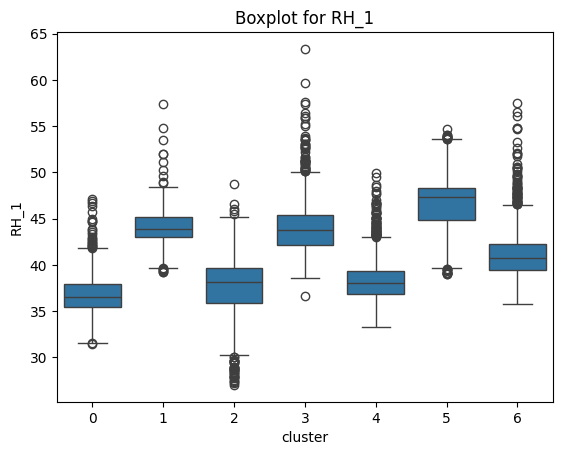

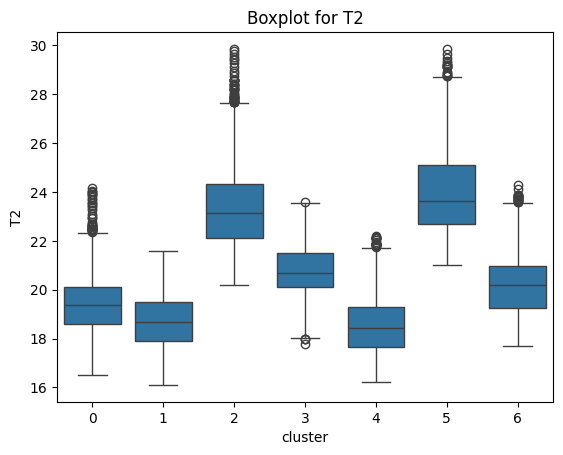

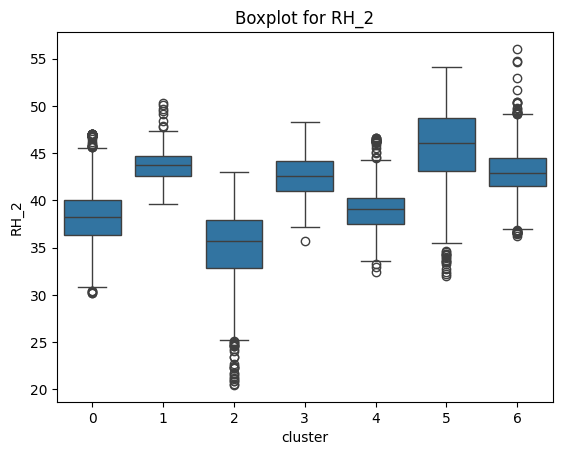

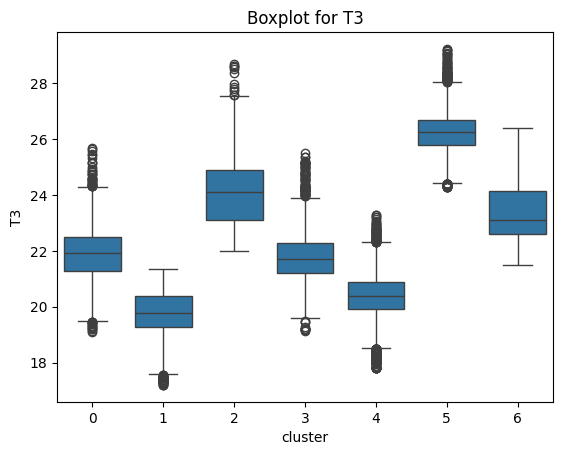

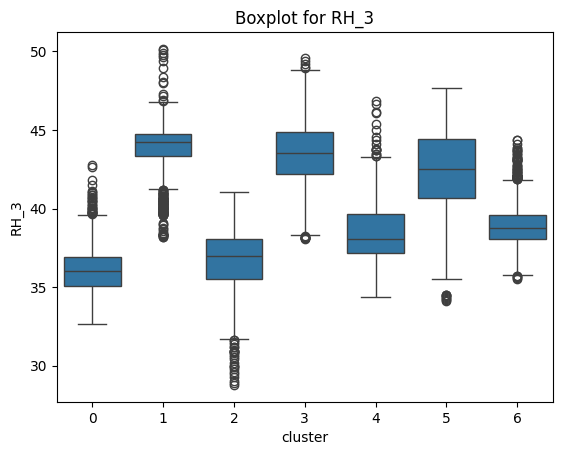

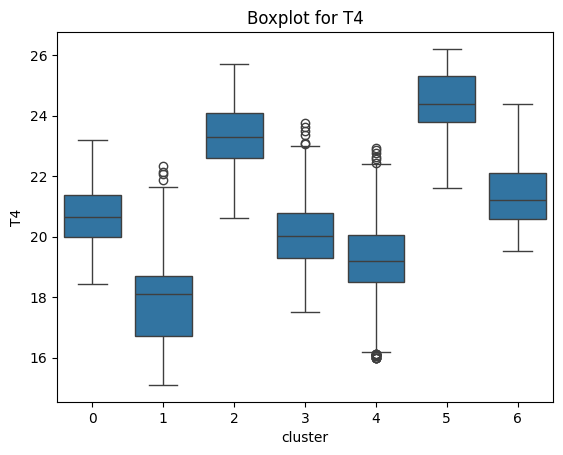

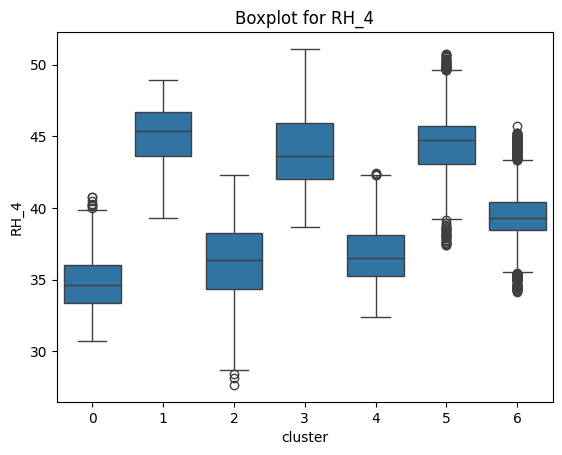

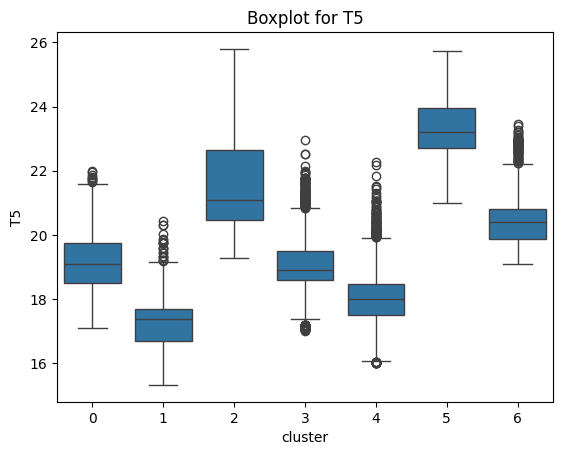

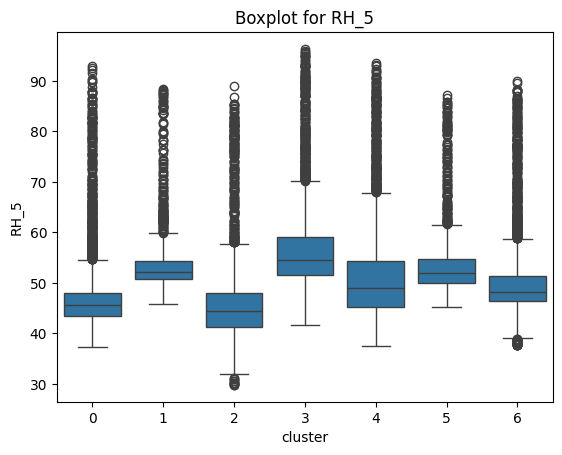

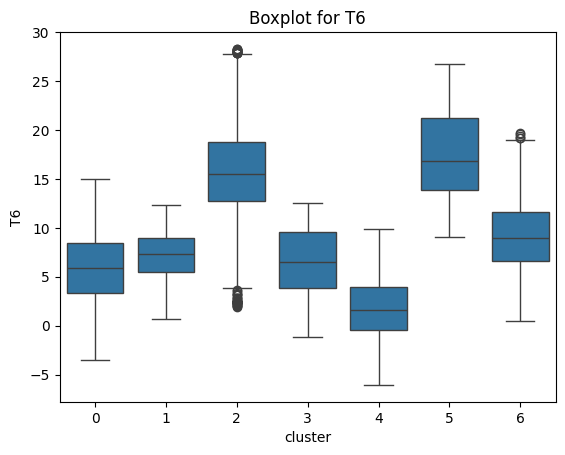

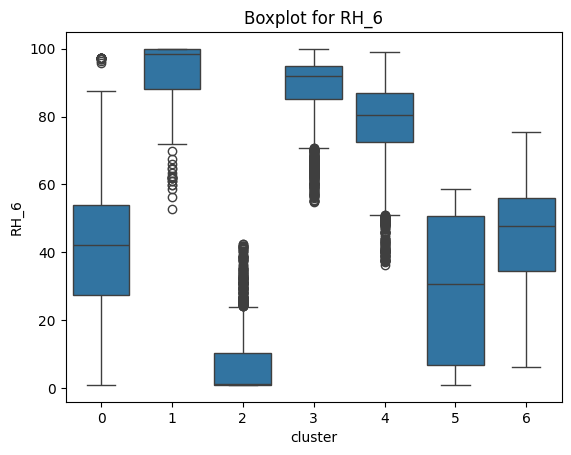

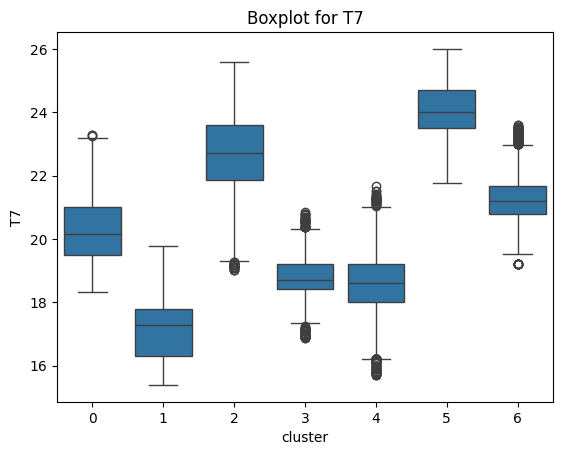

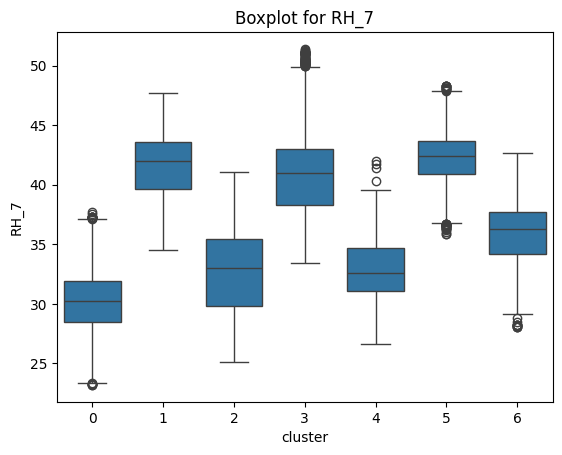

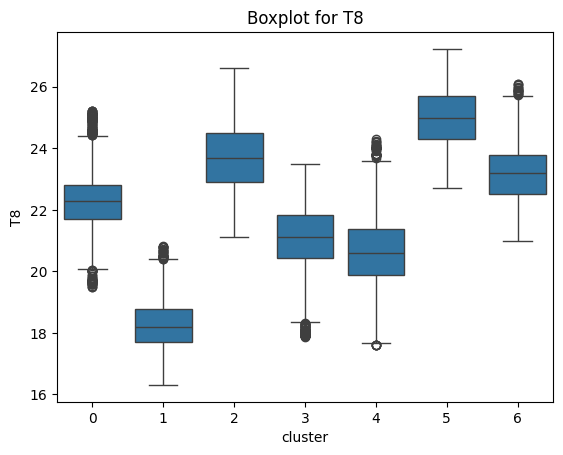

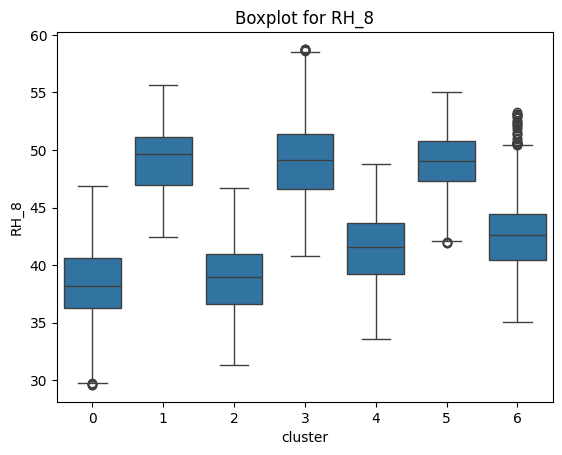

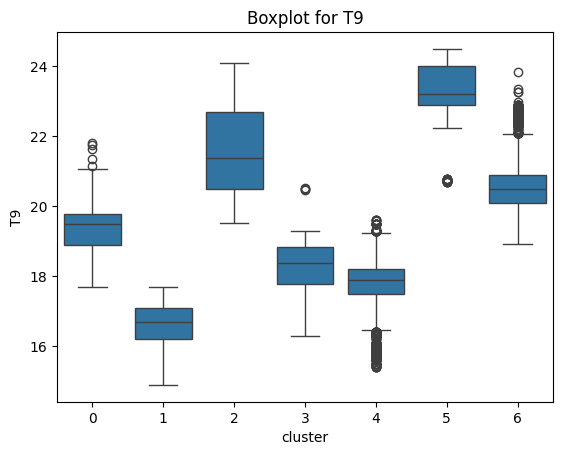

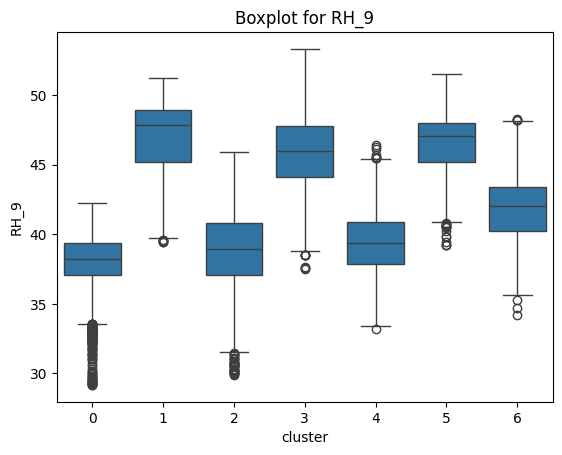

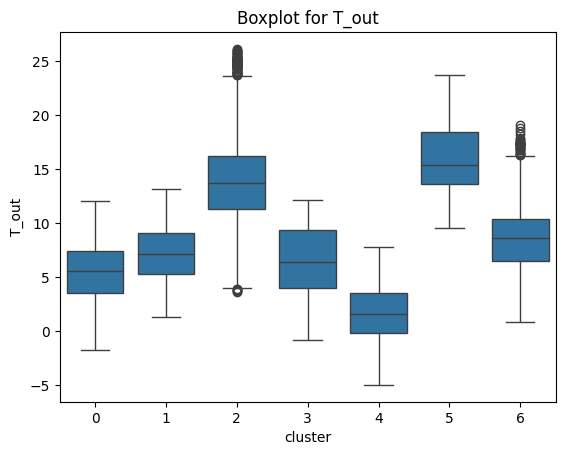

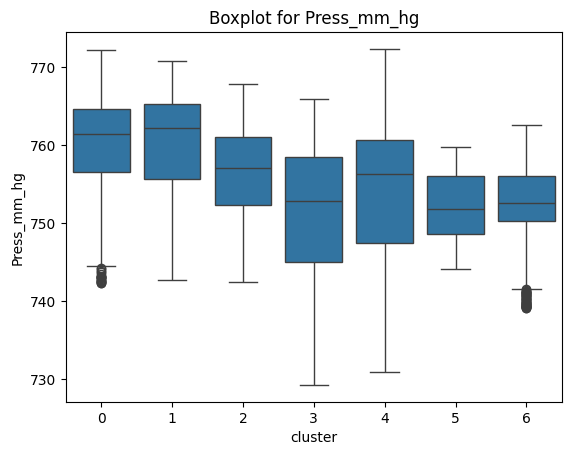

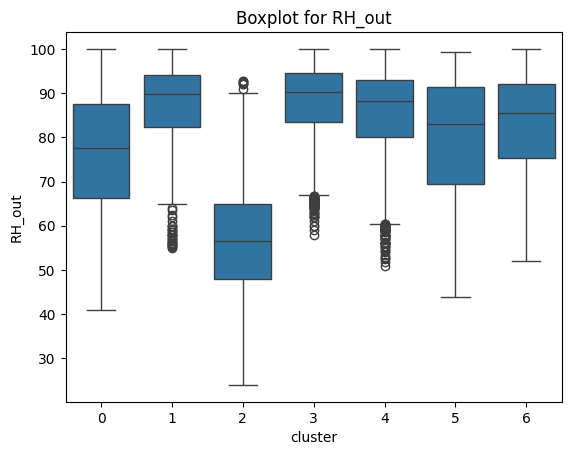

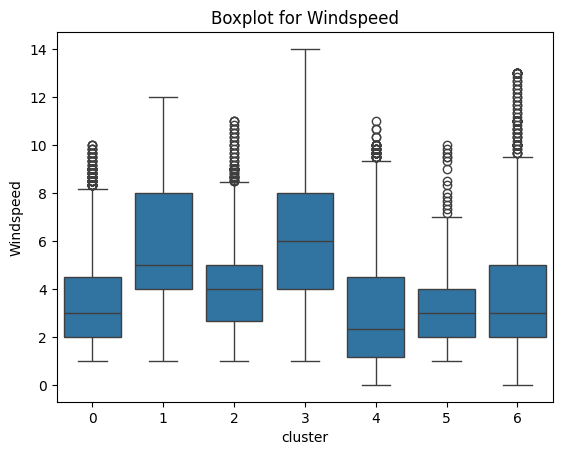

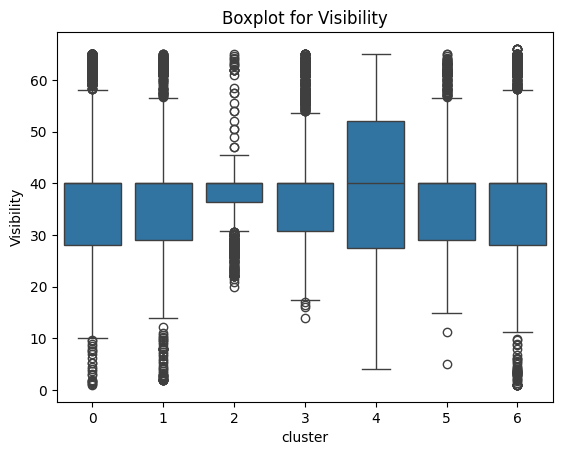

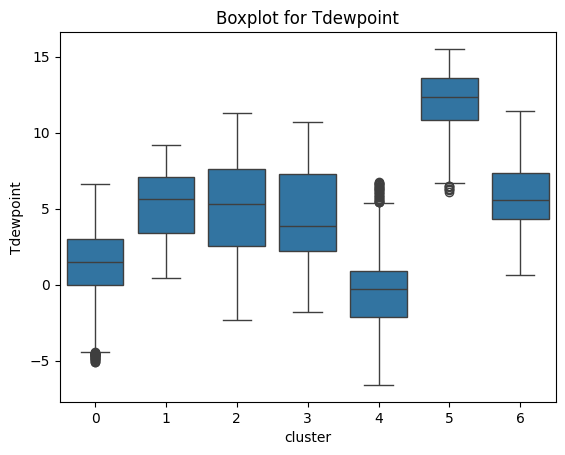

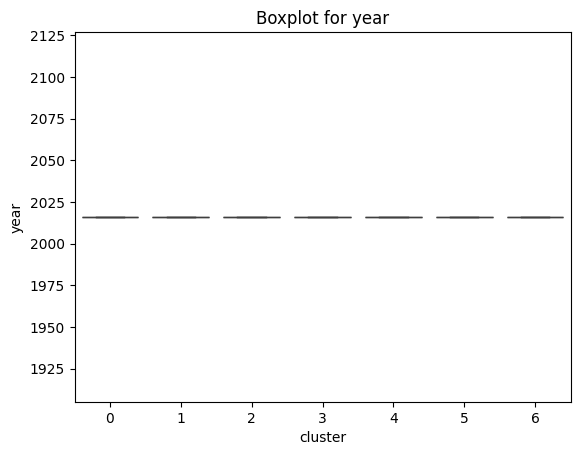

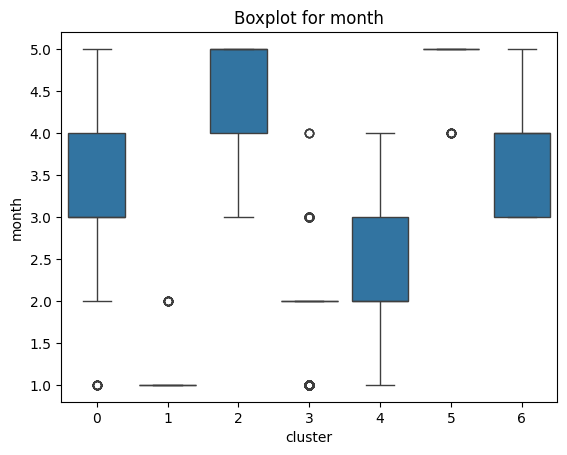

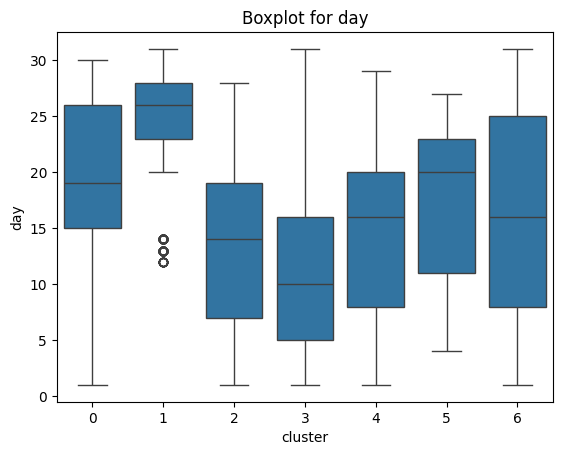

In [18]:
import seaborn as sns

# Generar boxplots para cada variable por grupo
for column in df.columns[:-1]:  # Excluir la columna de 'cluster'
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()


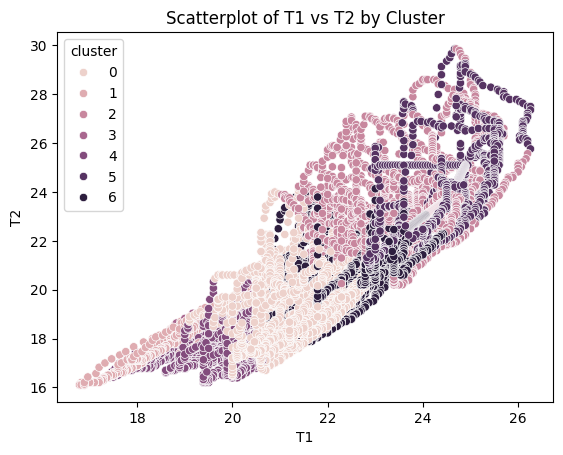

In [19]:
sns.scatterplot(x='T1', y='T2', hue='cluster', data=df)
plt.title('Scatterplot of T1 vs T2 by Cluster')
plt.show()